#IMDB DataSet

#Exe. 1 Load IMDB dataset from Keras 
with maximum number of num words =
10000 to include. It is a large dataset containing the text of 50, 000 movie reviews from the Internet Movie Database. This is a dataset for binary sentiment
classification of movies containing {0, 1}. Check train and test datasets sizes
and shapes

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [ ]:
print(test_data[0])
print(test_labels.shape)

[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
(25000,)


#Exe. 2 Prepare the data using the following code:


In [ ]:
def vectorize_sequences ( sequences , dimension =10000):
# Create an all - zero matrix of shape ( len ( sequences ), dimension)
  results = np.zeros((len( sequences ) , dimension))
  #print(results.shape)
  for i , sequence in enumerate (sequences):
    results [i , sequence ] = 1. # set specific indices of results [i] to 1s
  return results
# Our vectorized training data
x_train = vectorize_sequences(train_data )
# Our vectorized test data
x_test = vectorize_sequences(test_data)
  # Our vectorized labels
y_train = np.asarray( train_labels ).astype ('float32')
y_test = np.asarray( test_labels ).astype ('float32')


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 10000)
(25000, 10000)
(25000,)
(25000,)


We can observe that, input data is vectorized now (previously it was a data structure, not a vector) that is, now input data has 25000 rows and 10000 columns for both x_train and x_test

#Exe. 3 reducing the network size
design a neural network model namely
**original_model** with **two dense layers** of size **16** and each followed with an
activation function **relu**. Add a **final layer of 1 node** and an activation function
of **sigmoid**. For your network compilation, define a **rmsprop optimizer**, with a
**binary_crossentropy** and **acc** as the metric.

In [ ]:
original_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
original_model.compile(optimizer ='rmsprop',loss ='binary_crossentropy',metrics =['acc'])


#Exe. 4 Design a neural network model namely smaller_model
with **two dense layers** of size **4** and each followed with an activation function **relu**. Add a **final layer of 1 node **and an activation function of **sigmoid**. For your network compilation, define a **rmsprop** optimizer, with a **binary_crossentropy** and **acc** as
the metric

In [ ]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
smaller_model.compile(optimizer ='rmsprop',loss ='binary_crossentropy',metrics =['acc'])

#Exe. 5 
Fit the original model on the train set with the test set as the
validation set, 20 epochs and batch size = 512 and save it in original hist.

In [ ]:
 original_hist = original_model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs =20,batch_size = 512)

Epoch 1/20
49/49 [==============================] - 4s 56ms/step - loss: 0.5306 - acc: 0.7481 - val_loss: 0.3337 - val_acc: 0.8728
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2593 - acc: 0.9104 - val_loss: 0.3053 - val_acc: 0.8764
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1945 - acc: 0.9337 - val_loss: 0.2901 - val_acc: 0.8838
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1596 - acc: 0.9453 - val_loss: 0.2966 - val_acc: 0.8832
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1324 - acc: 0.9565 - val_loss: 0.3317 - val_acc: 0.8749
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1186 - acc: 0.9607 - val_loss: 0.3375 - val_acc: 0.8756
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1018 - acc: 0.9681 - val_loss: 0.3747 - val_acc: 0.8682
Epoch 8/20
49/49 [==============================] - 2s 42ms/step - loss: 0.0867 - a

#Exe. 6
Fit the smaller model on the train set with the test set as the validation set,
20 epochs and batch size = 512 and save it in smaller hist

In [ ]:
smaller_hist = smaller_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=512)

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.6335 - acc: 0.6080 - val_loss: 0.5344 - val_acc: 0.7907
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4975 - acc: 0.8457 - val_loss: 0.4687 - val_acc: 0.8696
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4204 - acc: 0.9058 - val_loss: 0.4163 - val_acc: 0.8858
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3428 - acc: 0.9281 - val_loss: 0.3315 - val_acc: 0.8830
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2420 - acc: 0.9388 - val_loss: 0.2908 - val_acc: 0.8884
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1898 - acc: 0.9452 - val_loss: 0.3021 - val_acc: 0.8782
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1670 - acc: 0.9494 - val_loss: 0.2857 - val_acc: 0.8856
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1474 - a

#Exe. 7 
Get the val_loss from the trained model histogram and save them in
new variables.

In [ ]:
# validation loss
original_loss = original_hist.history['val_loss']
smaller_loss = smaller_hist.history['val_loss']

#Exe. 8 Plot the validation loss values w.r.t the epochs
(we have 20 epochs)
and observe the loss value changing through the epochs increase.

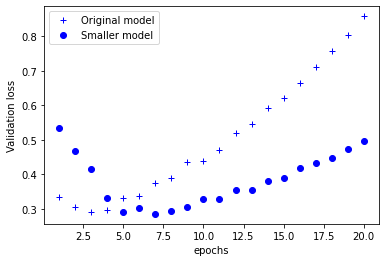

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1,21)
plt.plot(epochs, original_loss, 'b', linestyle='', marker='+',label='Original model')
plt.plot(epochs, smaller_loss, 'b', linestyle='', marker='o', label='Smaller model')
plt.xlabel('epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

We can observe that for initially with increase in epochs the validation loss for both original and smaller model decreased till the value 5.0, but after epoch 5.0, validation loss for original model increased rapidly and for smaller model it increased but at the lower rate.

Thus, smaller model has mitigated the overfitting.

#Exe. 9 Design a network that has much more capacity, far more than the problem would warrant. 
Call this model bigger_model with two dense layers of size 512 and each followed with an activation function relu. Add a final layer of 1
node and an activation function of sigmoid. For your network compilation, define a rmsprop optimizer, with a binary_crossentropy and acc as the metric.


In [ ]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
bigger_model.compile(optimizer ='rmsprop',loss ='binary_crossentropy',metrics =['acc'])


#Exe. 10 Fit the bigger_model on the train set with the test set as the validation set, 20 epochs and batch size = 512 and save it in bigger_hist.


In [ ]:
 bigger_hist = bigger_model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs =20,batch_size = 512)

Epoch 1/20
49/49 [==============================] - 17s 339ms/step - loss: 0.5999 - acc: 0.7251 - val_loss: 0.3528 - val_acc: 0.8486
Epoch 2/20
49/49 [==============================] - 16s 336ms/step - loss: 0.2253 - acc: 0.9115 - val_loss: 0.3235 - val_acc: 0.8669
Epoch 3/20
49/49 [==============================] - 17s 339ms/step - loss: 0.1323 - acc: 0.9494 - val_loss: 0.4129 - val_acc: 0.8540
Epoch 4/20
49/49 [==============================] - 17s 344ms/step - loss: 0.0561 - acc: 0.9819 - val_loss: 0.9115 - val_acc: 0.7880
Epoch 5/20
49/49 [==============================] - 16s 337ms/step - loss: 0.0344 - acc: 0.9908 - val_loss: 0.4426 - val_acc: 0.8755
Epoch 6/20
49/49 [==============================] - 17s 340ms/step - loss: 0.0037 - acc: 0.9999 - val_loss: 0.7128 - val_acc: 0.8801
Epoch 7/20
49/49 [==============================] - 17s 343ms/step - loss: 3.1599e-04 - acc: 1.0000 - val_loss: 0.9092 - val_acc: 0.8786
Epoch 8/20
49/49 [==============================] - 17s 351ms/ste

#Exe. 11 Plot the bigger and original validation loss changing w.r.t epochs changing. 



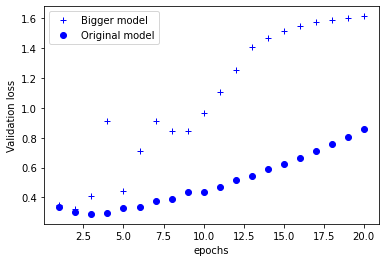

In [ ]:
bigger_loss=bigger_hist.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, bigger_loss, 'b', linestyle='', marker='+',label='Bigger model')
plt.plot(epochs, original_loss, 'b', linestyle='', marker='o', label='Original model')
plt.xlabel('epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

The more capacity the network has, the quicker it
will be able to model the training data, but if it converges quickly to 0, this is more susceptible for overfitting!

# Weight Regularization

A common way to mitigate overfitting is to put constraints on the
complexity of a network by forcing its weights to only take small values, which
makes the distribution of weight values more ”regular”. This is called  **"weight
regularization"**

In Keras, weight regularization is added by passing weight regularizer instances
to layers as keyword arguments: for instance,  **kernel regularizer=regularizers.l1(0.001)** where l1(0.001) means that every coefficient in the
weight matrix of the layer will add  **0.001 * weight coefficient** value to the total
loss of the network. Note that because this penalty is only added at training
time, the loss for this network will be much higher at training than at test time.

#Exe. 12 Modify the original network as l2_model by adding an L2 weight regularization to the model1. 
Add the L2 regularizers to the first two layers.

In [ ]:
from keras import regularizers
l2_model=keras.Sequential([
    keras.layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(1,activation='sigmoid')
])

l2_model.compile(optimizer ='rmsprop',loss ='binary_crossentropy',metrics =['acc'])


#Exe. 13 Fit the model on train set with previously presented parameters.

In [ ]:
 l2_model_hist = l2_model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs =20,batch_size = 512)

Epoch 1/20
49/49 [==============================] - 3s 51ms/step - loss: 0.5958 - acc: 0.7430 - val_loss: 0.3869 - val_acc: 0.8812
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3315 - acc: 0.9028 - val_loss: 0.3357 - val_acc: 0.8906
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2713 - acc: 0.9247 - val_loss: 0.3679 - val_acc: 0.8680
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2480 - acc: 0.9315 - val_loss: 0.3659 - val_acc: 0.8722
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2351 - acc: 0.9349 - val_loss: 0.3410 - val_acc: 0.8854
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2264 - acc: 0.9399 - val_loss: 0.3763 - val_acc: 0.8740
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2108 - acc: 0.9473 - val_loss: 0.3607 - val_acc: 0.8786
Epoch 8/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2052 - a

#Exe. 14 Plot the validation loss w.r.t epochs changing for original model and l2_model.

Observe, the model with L2 regularization and see how it is more
resistant to overfitting than the original model, even though both models have
the same number of parameters

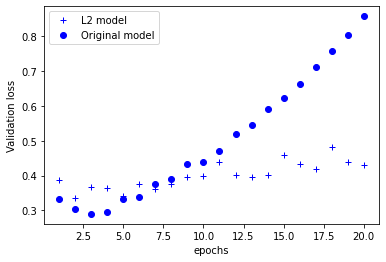

In [ ]:
l2_model_loss=l2_model_hist.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, l2_model_loss, 'b', linestyle='', marker='+',label='L2 model')
plt.plot(epochs, original_loss, 'b', linestyle='', marker='o', label='Original model')
plt.xlabel('epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

We can observe that using L2_model, the loss is much lesser than that of original model, although we used same model parameters(number of nodes and number of layers)

# Adding Dropout


Dropout, applied to a layer, consists of randomly “dropping out” (i.e. setting to
zero) a number of output features of the layer during training.

The dropout can be added to the model in Keras using **layers.Dropout(0.5)**
where 0.5 is the dropout rate indicating 50% of nodes should be dropped for
the following layer randomly.

The dropout should be applied to the output of layer right before the layer.

#Exe. 15 Modify the original network by adding a dropout after each layer of 16 nodes. Name this model dpt_model

In [ ]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
dpt_model.compile(optimizer ='rmsprop',loss ='binary_crossentropy',metrics =['acc'])

#Exe. 16 Fit the model on the set with previously presented parameters.

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs =20,batch_size = 512)

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.6511 - acc: 0.6032 - val_loss: 0.4674 - val_acc: 0.8662
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.4879 - acc: 0.7827 - val_loss: 0.3524 - val_acc: 0.8814
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3956 - acc: 0.8476 - val_loss: 0.3002 - val_acc: 0.8867
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3231 - acc: 0.8866 - val_loss: 0.2865 - val_acc: 0.8852
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2708 - acc: 0.9100 - val_loss: 0.2760 - val_acc: 0.8894
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2328 - acc: 0.9240 - val_loss: 0.2849 - val_acc: 0.8888
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2150 - acc: 0.9313 - val_loss: 0.3036 - val_acc: 0.8874
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1862 - a

#Exe. 17 Plot the validation loss changing w.r.t the epochs changing for two original and dropout model. 
What are your observations? Do you see any improvement over the original network?

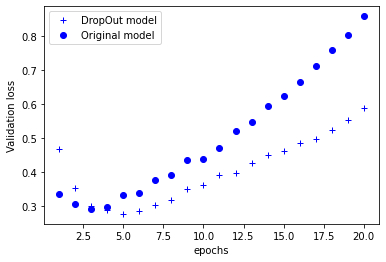

In [ ]:
dpt_model_loss=dpt_model_hist.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, dpt_model_loss, 'b', linestyle='', marker='+',label='DropOut model')
plt.plot(epochs, original_loss, 'b', linestyle='', marker='o', label='Original model')
plt.xlabel('epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

We can observe that as compared to the original model, drop out model has lesser validation loss even though the model parameters (no of nodes and no of layers) are same.

#House Pricing DataSet

#Exe. 1 Load House Price DataSet
The goal is to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points
about the suburb at the time, such as the crime rate, the local property tax
rate, and so on. 


Load the boston_housing dataset in train and test and check
the data shape and sizes.

In [ ]:
try :
# % tensorflow_version only exists in Colab .
  % tensorflow_version 2.x
except Exception :
  pass
from keras.datasets import boston_housing

In [ ]:
( train_data , train_targets ) , ( test_data , test_targets ) = boston_housing.load_data()


57344/57026 [==============================] - 0s 0us/step


In [ ]:
print("training data shape:- ",train_data.shape)
print("testing data shape:- ",test_data.shape)
print("training data dimensions:- ",train_data.ndim)
print("testing data dimensions:- ",test_data.ndim)
print("----------------------------------------------")
print("train_target shape:- ",train_targets.shape)
print("test_target shape:- ",test_targets.shape)
print("train_target dimensions:- ",train_targets.ndim)
print("test_target dimensions:- ",test_targets.ndim)

training data shape:-  (404, 13)
testing data shape:-  (102, 13)
training data dimensions:-  2
testing data dimensions:-  2
----------------------------------------------
train_target shape:-  (404,)
test_target shape:-  (102,)
train_target dimensions:-  1
test_target dimensions:-  1


In [ ]:
print("Train data:-\n\n",train_data)
print("---------------------------------------------------------------------------\n")
print("Test data:-\n\n",test_data)

Train data:-

 [[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
---------------------------------------------------------------------------

Test data:-

 [[1.80846e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.72500e+01
  2.90500e+01]
 [1.23290e-01 0.00000e+00 1.00100e+01 ... 1.78000e+01 3.94950e+02
  1.62100e+01]
 [5.49700e-02 0.00000e+00 5.19000e+00 ... 2.02000e+01 3.96900e+02
  9.74000e+00]
 ...
 [1.83377e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.89610e+02
  1.92000e+00]
 [3.58090e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.91700e+02
  9.710

The targets are the median values of owner-occupied homes, in thousands
of dollars. Print them to check their data 2

In [ ]:
print("Train targets:-\n\n",train_targets)
print("-------------------------------------------------------------------------------\n")
print("Test targets:-\n\n",test_targets)

Train targets:-

 [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21

#Exe. 2 Normalizing data For each feature in the input data
(a column in the input data matrix), subtract the mean of the feature and divide by the standard deviation i.e. **∀x, x = x−µ/σ**


In this way the feature is centered around 0 and
has a unit standard deviation. 
**Hint**: use **.mean(axis=0)** and **.std(axis=0)** for computing mean and standard deviation

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
def normalize_data(data):
  # create scaler
  scaler = StandardScaler()
  # fit scaler on data
  scaler.fit(data)
  # apply transform
  standardized = scaler.transform(data)
  return standardized
normalize_data(train_data)
normalize_data(test_data)
"""

'\nfrom sklearn.preprocessing import StandardScaler\ndef normalize_data(data):\n  # create scaler\n  scaler = StandardScaler()\n  # fit scaler on data\n  scaler.fit(data)\n  # apply transform\n  standardized = scaler.transform(data)\n  return standardized\nnormalize_data(train_data)\nnormalize_data(test_data)\n'

In [ ]:
def normalize_data(data): 
  mean = data.mean(axis = 0)
  std = data.std(axis = 0)
  for i in range(len(data)): 
    row = data[i]
    for j in range(len(row)): 
      if(std[j]!=0):
        data[i][j] = (row[j] - mean[j])/(std[j])
      else:
        data[i][j] = (row[j] - mean[j])/1
  return data

In [ ]:
train_data=normalize_data(train_data)
test_data=normalize_data(test_data)
print("Normalized train data:-\n\n",train_data)

Normalized train data:-

 [[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


In [ ]:
print("Normalized test data:-\n\n",test_data)

Normalized test data:-

 [[ 2.8040301  -0.50784934  0.96960877 ...  0.90513041 -4.27829517
   2.51324773]
 [-0.55530596 -0.50784934 -0.17801704 ... -0.28485844  0.3909446
   0.58604286]
 [-0.56808398 -0.50784934 -0.86176938 ...  0.90513041  0.41570668
  -0.38506427]
 ...
 [-0.23539182 -0.50784934  1.17955762 ... -1.82192738  0.32313459
  -1.55879807]
 [-0.5113909  -0.50784934 -0.71849348 ... -0.48318992  0.34967446
  -0.38956708]
 [-0.03148414 -0.50784934  1.17955762 ... -1.82192738 -1.57465677
  -0.3745577 ]]


#Exe. 3 Model definition
Because so few samples are available, use a very
small network with **two hidden layers**, each with **64** units and **relu** activation.
To have a linear layer output, add a **final layer with a single unit** and no activation function. 

Compile the network with the **mse** ( mean squared error)
loss function. Monitoring a new metric during training: mean absolute error (
**mae** )
Finally define the optimizer = **'rmsprop'** in the model compilation.

Define the model in a function named **build_model**().

In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  # complete the model here
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation = None))
  # compile model
  model.compile(optimizer ='rmsprop',loss='mean_squared_error',metrics =['mae'])
  return model

#Exe. 4 Model Validation

Using K-fold cross-validation

In [ ]:
import numpy as np
# using k=4 iterations
k = 4
num_val_samples = len( train_data ) // k
num_epochs = 100
all_scores = []
for i in range (k ):
  print ('processing fold #', i+1,"/",k )
  val_data = train_data [i * num_val_samples : ( i + 1) *num_val_samples ]
  val_targets = train_targets [i * num_val_samples : (i + 1) *num_val_samples ]
  partial_train_data = np.concatenate ([ train_data [: i * num_val_samples ], train_data [( i + 1) * num_val_samples :]] , axis=0)
  partial_train_targets = np . concatenate ([ train_targets [: i *num_val_samples ], train_targets [( i + 1) * num_val_samples :]] ,axis =0)
  # you should call build_model here
  model=build_model()
  # you should fit model here
  model_hist=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data,val_targets), epochs = num_epochs)
  #the following line is for evaluating the test set
  val_mse , val_mae = model.evaluate(val_data, val_targets , verbose=0)
  all_scores.append(val_mae )


processing fold # 1 / 4
Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 555.0561 - mae: 21.9072 - val_loss: 471.7053 - val_mae: 19.6249
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 482.7290 - mae: 20.3059 - val_loss: 391.0776 - val_mae: 17.6710
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 377.8820 - mae: 17.7245 - val_loss: 303.7855 - val_mae: 15.3467
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 309.8066 - mae: 15.8760 - val_loss: 223.1135 - val_mae: 12.8371
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 222.6004 - mae: 12.9384 - val_loss: 153.6267 - val_mae: 10.2334
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 155.1755 - mae: 10.4481 - val_loss: 99.8213 - val_mae: 7.7659
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 113.1674 - mae: 8.2888 - val_loss: 65.6357 - val_mae: 5.9384
Epoch 8/100
10/10 [==

#Exe. 5 print the overall score of your model and check its average

In [ ]:
print("Overall scores:-", all_scores)
print("Average score:-", np.mean(np.array(all_scores)))

Overall scores:- [1.8804481029510498, 2.6617023944854736, 2.611178159713745, 2.523930311203003]
Average score:- 2.419314742088318


#Exe. 6 Now training the network a bit longer: 500 epochs.
To keep a record of how well the model does at each epoch, we should modify the training loop to save the per-epoch validation score log. Modify the code from the previous
exercise in order to save **val_mean_absolute_error** after each epoch for any
fold of cross validation.



In [ ]:
import numpy as np
# using k=4 iterations
k = 4
num_val_samples = len( train_data ) // k
num_epochs = 500
all_scores = []
mae_all_history=[]
for i in range (k ):
  print ('processing fold #', i+1,"/",k )
  val_data = train_data [i * num_val_samples : ( i + 1) *num_val_samples ]
  val_targets = train_targets [i * num_val_samples : (i + 1) *num_val_samples ]
  partial_train_data = np.concatenate ([ train_data [: i * num_val_samples ], train_data [( i + 1) * num_val_samples :]] , axis=0)
  partial_train_targets = np . concatenate ([ train_targets [: i *num_val_samples ], train_targets [( i + 1) * num_val_samples :]] ,axis =0)
  # you should call build_model here
  model=build_model()
  # you should fit model here
  history = model.fit(partial_train_data , partial_train_targets ,validation_data =( val_data , val_targets ) , epochs = num_epochs ,batch_size =1 , verbose =0)
  mae_history = history.history ['val_mae']
  mae_all_history.append(mae_history)
  #the following line is for evaluating the test set
  val_mse , val_mae = model.evaluate(val_data, val_targets , verbose=0)
  all_scores.append(val_mae)

#Exe. 7 Compute the average of the per-epoch mae scores for all folds

In [ ]:
average_mae = np.mean(np.array(mae_all_history),axis=0)
average_mae

#Exe. 8 Plot the average of the per-epoch MAE scores w.r.t epochs changing.



In [ ]:
x_range = range(1,len(average_mae)+1)
plt.figure(figsize=(10, 10))
plt.plot(x_range, average_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#Exe. 9 It may be a little difficult to see the plot, due to scaling issues and relatively high variance.
Let’s do the following:
- Omit the first 10 data points, which are on a different scale than the rest of the curve.


In [ ]:
avg_mae_omit=average_mae[10:]
x_range = range(1,len(avg_mae_omit)+1)
plt.figure(figsize=(10, 10))
plt.plot(x_range, avg_mae_omit)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- Replace each point with an exponential moving average of the previous points,to
obtain a smooth curve i.e. **point = previous point∗f actor+point∗(1−factor)**
where factor is a value between 0 and 1. 

In [ ]:
def smooth_curve(points, factor=0.8):
  new_points = []
  for point in points:
    if new_points:
      previous = new_points[-1]
      new_points.append(previous * factor + point * (1 - factor))
    else:
      new_points.append(point)
  return new_points
exp_mae_history = smooth_curve(average_mae[10:])
x_range = range(1, len(exp_mae_history) + 1)
plt.figure(figsize=(10, 10))
plt.plot(x_range, exp_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()

According to this plot, you can check
when the validation MAE stops improving or becomes worst after Epoch 70 or 80 . Past the special
point around 70 or 80 on the graph, the model starts overfitting. 

#Exe. 10 After finishing tuning other parameters of the model, train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data from the Exe. 1.


# Final model using epochs=80

In [ ]:
# Final model using epochs=80
model=build_model()
model_hist=model.fit(train_data, train_targets,validation_data=None, epochs =80)

In [ ]:
test_mse , test_mae = model.evaluate(test_data, test_targets , verbose=0)
print("MSE:-",test_mse)
print("MAE:-",test_mae)

# Final model by changing the size of hidden layers

In [ ]:
def build_model():
  model = models.Sequential()
  # complete the model here
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation = None)) # As the output is continuous (regression), we are not using activation function
  # compile model
  model.compile(optimizer ='rmsprop',loss='mean_squared_error',metrics =['mae'])
  return model

model=build_model()
model_hist=model.fit(train_data, train_targets,validation_data=None, epochs =80)

In [ ]:
test_mse , test_mae = model.evaluate(test_data, test_targets , verbose=0)
print("MSE:-",test_mse)
print("MAE:-",test_mae)

Hence, MAE is still around 2.6